In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
def generate_poisson_process(λ, T):
    N = np.random.poisson(λ * T**2) # T**2 for a squared domain
    X = np.random.uniform(0, T, N) # points are generated uniformly
    Y = np.random.uniform(0, T, N)
    return X, Y

In [ ]:
def estimate_pi(X, Y, circle_center, circle_radius):
    if len(X) == 0:
        return np.nan, [] # empty list of points if N=0
    points_in_circle = np.sqrt((X - circle_center[0])**2 + (Y - circle_center[1])**2) < circle_radius
    return 4 * np.sum(points_in_circle) / len(X), points_in_circle


In [ ]:
def run_simulation(λ, T, M):
    pi_estimates = np.zeros(M)
    for i in range(M):
        X, Y = generate_poisson_process(λ, T)
        pi_estimates[i], points_in_circle = estimate_pi(X, Y, [1/2, 1/2], 1/2)
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.scatter(X[points_in_circle], Y[points_in_circle], color='green', s=1, label='Inside circle')
    ax.scatter(X[~points_in_circle], Y[~points_in_circle], color='red', s=1, label='Outside circle')
    circle = plt.Circle((1/2, 1/2), 1/2, color='black', fill=False)
    ax.add_artist(circle)
    plt.legend()
    plt.title(f'Points in and out of circle for λ={λ}')
    plt.show()
    return pi_estimates


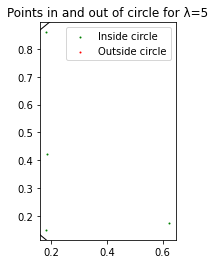

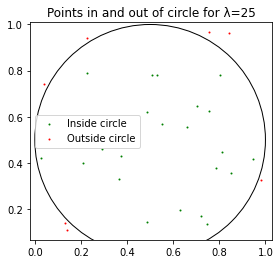

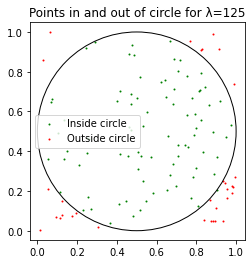

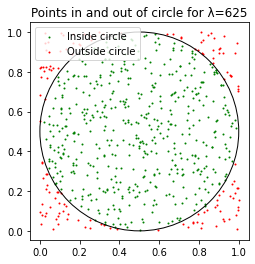

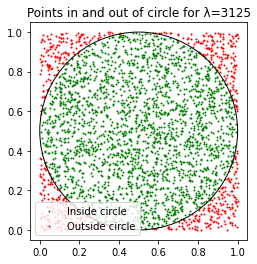

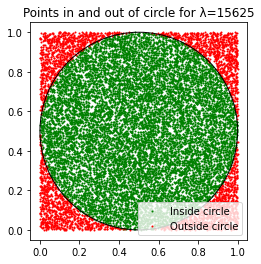

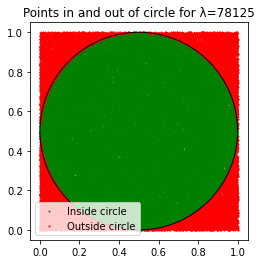

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


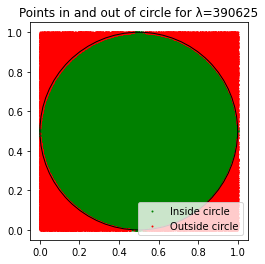

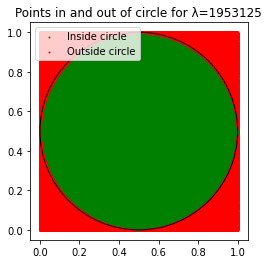

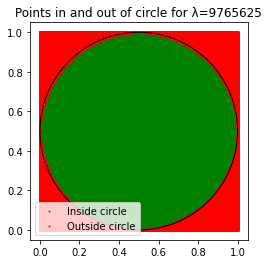

In [ ]:
# parameters
T = 1
M = 100
lambdas = [5 ** k for k in range(1, 11)]

# run the simulation for different values of lambda
pi_estimates = [run_simulation(λ, T, M) for λ in lambdas]

In [ ]:
cmap = cm.get_cmap('tab10')

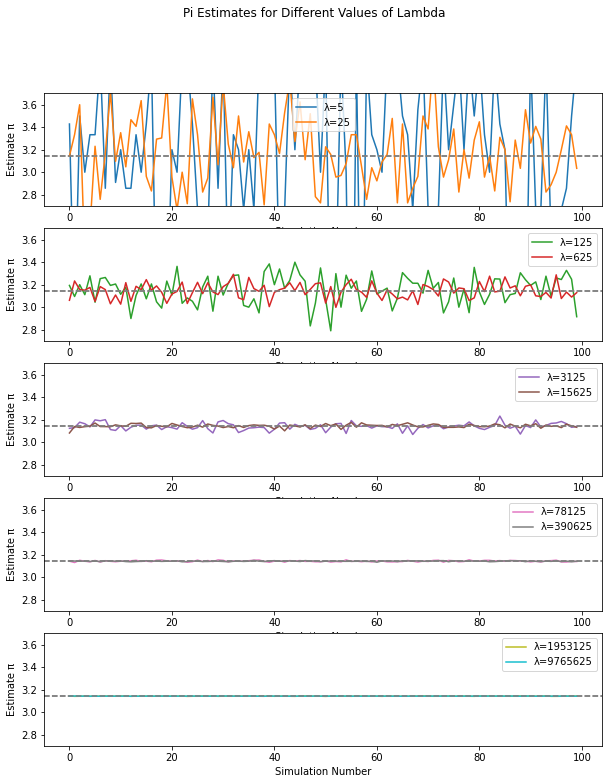

In [ ]:
# Plot the pi estimates for different values of lambda
fig, axs = plt.subplots(5, 1, figsize=(10,12))
for i in range(2):
    axs[0].plot(pi_estimates[i], color=cmap(i), label=f'λ={lambdas[i]}')
    axs[0].axhline(y=3.14159, color='gray', linestyle='--')
    axs[0].set_ylim(2.7, 3.7)
for i in range(2, 4):
    axs[1].plot(pi_estimates[i], color=cmap(i), label=f'λ={lambdas[i]}')
    axs[1].axhline(y=3.14159, color='gray', linestyle='--')
    axs[1].set_ylim(2.7, 3.7)
for i in range(4, 6):
    axs[2].plot(pi_estimates[i], color=cmap(i), label=f'λ={lambdas[i]}')
    axs[2].axhline(y=3.14159, color='gray', linestyle='--')
    axs[2].set_ylim(2.7, 3.7)
for i in range(6, 8):
    axs[3].plot(pi_estimates[i], color=cmap(i), label=f'λ={lambdas[i]}')
    axs[3].axhline(y=3.14159, color='gray', linestyle='--')
    axs[3].set_ylim(2.7, 3.7)
for i in range(8, 10):
    axs[4].plot(pi_estimates[i], color=cmap(i), label=f'λ={lambdas[i]}')
    axs[4].axhline(y=3.14159, color='gray', linestyle='--')
    axs[4].set_ylim(2.7, 3.7)
for ax in axs:
    ax.set_xlabel('Simulation Number')
    ax.set_ylabel('Estimate π')
    ax.legend()
plt.suptitle('Pi Estimates for Different Values of Lambda')
plt.show()

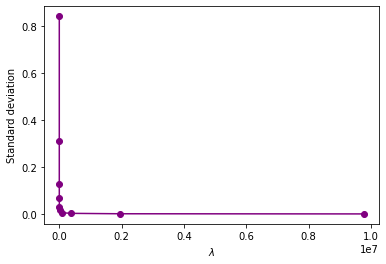

In [ ]:
# Calculate standard deviation of pi_estimates
# pi_std = np.std(pi_estimates, axis=1)
std_dev = [np.std(estimates) for estimates in pi_estimates]

# Plot standard deviation of pi_estimates
plt.figure()
# plt.plot(lambdas, pi_std, 'o-', color='purple')
plt.plot(lambdas, std_dev, 'o-', color='purple')
# plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standard deviation')
# plt.title('Standard deviation of $\pi$ estimates vs $\lambda$')
plt.show()
